# Datasets: alquileres de inmuebles en ciuades europeas - Airbnb.

Durante el TP, se trabajará con un dataset conformado por múltiples archivos CSV, donde todos tienen las mismas columnas, y cada fila corresponde a una propiedad en alquiler publicada en AirBnb.

# Columnas

A continuación se describen las columnas de cada archivo CSV:

* realSum: El precio total del alojamiento para dos personas y dos noches en EUR.
* room_type: El tipo de alojamiento.
* room_shared: Variable ficticia que indica si las habitaciones son compartidas.
* room_private: Variable ficticia para habitaciones privadas.
* person_capacity: El número máximo de huéspedes.
* host_is_superhost: Variable ficticia que indica si el anfitrión es un “superanfitrión”.
* multi: Variable ficticia que indica si la publicación pertenece a anfitriones con 2-4 ofertas.
* biz: Variable ficticia que indica si la publicación pertenece a anfitriones con más de 4 ofertas.
* cleanliness_rating: Calificación de limpieza. Oscila entre 2 (como peor calificación) y 10 (como mejor calificación)
* guest_satisfaction_overall: Calificación general del alojamiento. Oscila entre 0 (para el menor valor) y 100 (para el mayor valor).
* bedrooms: Número de habitaciones (0 para estudios).
* dist: Distancia hasta el centro de la ciudad, en km.
* metro_dist: Distancia desde la estación de metro más cercana, en km.
* attr_index: Índice de atracción de la ubicación del alojamiento listado.
* attr_index_norm: Índice de atracción normalizado (0-100).
* rest_index: Índice de restaurantes de la ubicación del alojamiento .
* attr_index_norm: Índice de restaurantes normalizado (0-100).
* lng: Coordenadas de longitud de la ubicación del alojamiento.
* lat: Coordenadas de latitud de la ubicación del alojamiento.

# Unión de archivos CSV

A continuación se muestra cómo se han agregado dos columnas en cada archivo:
* weekday: corresponde a un booleano que indica si el alquiler es en día de semana
* city: indica la ciudad europea donde se encuentra el inmueble

Estas dos columnas, se agregan a cada archivo para luego identificarlos al momento de realizar la unión.

In [103]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

folder_path = os.getcwd()
folder_path

dataframes=[]

#Creamos dataframe que contendrá a todos los archivos
columnas = ['realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity',
            'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
            'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
            'rest_index_norm', 'lng', 'lat', 'weekday', 'city']
df_combinado = pd.DataFrame(columns=columnas)

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)

        # Obtén el nombre de la ciudad del archivo
        city = file_name.split('_')[0]

        # Determina si es un archivo de días de semana o fin de semana
        is_weekday = file_name.endswith('_weekdays.csv')

        # Leer el archivo CSV en un DataFrame
        df_unitario = pd.read_csv(file_path, engine='python', delimiter=',')

        # Agregar las columnas 'weekday' y 'city'
        df_unitario ['weekday'] = is_weekday
        df_unitario ['city'] = city

        #Unimos los dataframes
        df_combinado = pd.concat([df_combinado, df_unitario ])
        
# Borrar columna de ID de cada archivo
df_combinado.drop(df_combinado.columns[df_combinado.columns.size - 1], axis=1, inplace=True)
df_combinado

C:\Users\leoca\AppData\Local\Temp\ipykernel_5244\814976003.py:37: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_combinado = pd.concat([df_combinado, df_unitario ])
C:\Users\leoca\AppData\Local\Temp\ipykernel_5244\814976003.py:37: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_combinado = pd.concat([df_combinado, df_unitario ])
C:\Users\leoca\AppData\Local\Temp\ipykernel_5244\814976003.py:37: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_combinado = pd.concat([df_combinado, df_unitario ])
C:\Users\leoca\AppData\Local\Temp\ipykernel_5244\814976003.py:37: FutureWarning: In a future version, object-dty

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna
1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna
1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna
1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna


# Agregar columnas dayPriceByPerson y dayPrice

A continuación se muestra cómo se han agregado dos columnas en cada archivo:

* dayPrice: precio del lugar del alquiler por día.
* dayPriceByPerson: precio a pagar por persona del total del alquiler, a capacidad llena.

Como se detallo en el informe, estas columnas derivan de la columna "realSum", y son utilizadas para un mejor entendimiento de los precios de los alquileres.

In [104]:
df_combinado.insert(1, 'dayPrice', value=(df_combinado["realSum"]/4))
df_combinado

,realSum,dayPrice,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city
0,194.033698,48.508425,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam
1,344.245776,86.061444,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam
2,264.101422,66.025356,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam
3,433.529398,108.382349,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam
4,485.552926,121.388231,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,715.938574,178.984643,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna
1795,304.793960,76.198490,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna
1796,637.168969,159.292242,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna
1797,301.054157,75.263539,Private room,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna


In [105]:
df_combinado.insert(2, 'dayPriceByPerson', value=(df_combinado["realSum"]/4) * df_combinado["person_capacity"])
df_combinado

,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city
0,194.033698,48.508425,97.016849,Private room,False,True,2.0,False,1,0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,amsterdam
1,344.245776,86.061444,344.245776,Private room,False,True,4.0,False,0,0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,amsterdam
2,264.101422,66.025356,132.050711,Private room,False,True,2.0,False,0,1,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,amsterdam
3,433.529398,108.382349,433.529398,Private room,False,True,4.0,False,0,1,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,amsterdam
4,485.552926,121.388231,242.776463,Private room,False,True,2.0,True,0,0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,715.938574,178.984643,1073.907861,Entire home/apt,False,False,6.0,False,0,1,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,vienna
1795,304.793960,76.198490,152.396980,Entire home/apt,False,False,2.0,False,0,0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,vienna
1796,637.168969,159.292242,318.584484,Entire home/apt,False,False,2.0,False,0,0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,vienna
1797,301.054157,75.263539,150.527079,Private room,False,True,2.0,False,0,0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,vienna


# Descripción de tipos de datos
A continuación, se denotan los tipos de datos de cada una de las columnas del dataset.

In [106]:
#print(df_combinado.dtypes)

df_combinado['room_shared']= df_combinado['room_shared'].astype(bool)
df_combinado['room_private']= df_combinado['room_private'].astype(bool)
df_combinado['host_is_superhost']= df_combinado['host_is_superhost'].astype(bool)
df_combinado['person_capacity']= df_combinado['person_capacity'].astype(int)
df_combinado['multi']= df_combinado['multi'].astype(int)
df_combinado['biz']= df_combinado['biz'].astype(int)
df_combinado['cleanliness_rating']= df_combinado['cleanliness_rating'].astype(int)
df_combinado['guest_satisfaction_overall']= df_combinado['guest_satisfaction_overall'].astype(int)
df_combinado['bedrooms']= df_combinado['bedrooms'].astype(int)
df_combinado['lng'] = df_combinado['lng'].astype(float)
df_combinado['lat'] = df_combinado['lat'].astype(float)
df_combinado['dayPrice'] = df_combinado['dayPrice'].astype(float)

print(df_combinado.dtypes)

realSum                       float64
dayPrice                      float64
dayPriceByPerson              float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int32
host_is_superhost                bool
multi                           int32
biz                             int32
cleanliness_rating              int32
guest_satisfaction_overall      int32
bedrooms                        int32
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
weekday                        object
city                           object
dtype: object


**Descripción general del dataset**

In [52]:
#Atributos numéricos
df_combinado.describe()

,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000,103414.000000
mean,267.010911,66.752728,229.141006,3.161661,0.291353,0.350204,9.390624,92.628232,1.158760,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,255.798081,63.949520,284.121232,1.298539,0.454388,0.477036,0.954864,8.945488,0.627407,2.393791,0.858019,224.753036,9.807937,497.917819,17.804010,9.799677,5.249238
min,34.779339,8.694835,17.389670,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,37.188043,90.194972,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.453138,0.248477,136.796010,6.380888,250.854014,8.751467,-0.072500,41.399500
50%,211.343089,52.835772,149.860894,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,312.703887,78.175972,270.702509,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.263123,0.737888,385.760222,17.415380,832.629178,32.964878,13.519153,51.471912
max,18545.450285,4636.362571,19405.912651,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [77]:
#Atributos categóricos
df_combinado.describe(include=['object'])

,room_type,weekday,city
count,155121,155121,155121
unique,3,2,11
top,Entire home/apt,False,Dataset objetivo.csv
freq,97944,129621,103414


# Análisis y comprensión de datos

El siguiente analisis se realiza con la intención de analizar la calidad de los datos perteneciente al dataframe resultante, es decir, realizar la identificación de datos erróneos, faltantes, inconsistentes, etc.


**Analisis de valores nulos**

In [107]:
# Obtener el conteo de valores nulos por columna
null_counts = df_combinado.isnull().sum()

# Imprimir el conteo de valores nulos
print(null_counts)

realSum                       0
dayPrice                      0
dayPriceByPerson              0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
weekday                       0
city                          0
dtype: int64


Como muestra la salida del comando, no se encontraron valores nulos en niguna de las columnas del dataset.

**Analisis de homogeneidad**

In [79]:
unique_counts = df_combinado.nunique()
print(unique_counts)

realSum                       10690
dayPrice                      10690
dayPriceByPerson              17627
room_type                         3
room_shared                       2
room_private                      2
person_capacity                   5
host_is_superhost                 2
multi                             2
biz                               2
cleanliness_rating                9
guest_satisfaction_overall       53
bedrooms                         10
dist                          52261
metro_dist                    51816
attr_index                    52719
attr_index_norm               52366
rest_index                    52294
rest_index_norm               52431
lng                           23600
lat                           21484
weekday                           2
city                             11
dtype: int64


La salida del comando muestra la cantidad de valores distintos que posee cada una de las columnas del dataset, a continuacion se especifican y detallan los valores:

* room_type:Se especifican 3 valores dependiendo el tipo de alojamiento,  se definen 3 valores distintos, "Private room", "Shared room" y "Entire home/apt".
* room_share: Se especifican 2 valores dependiendo si la habitación es compartida, True si la habitación es compartida o False si la habitación no es compartida.               
* room_private: Se especifican 2 valores dependiendo si la habitación es privada, True si la habitación es privada o False si la habitación no es privada.     
* host_is_superhost: Se especifican 2 valores dependiendo si el anfitrión es un “superanfitrión”, True si es un “superanfitrión” o False si no es es un “superanfitrión”.               
* multi: Se especifican 2 valores que indica si la publicación pertenece a anfitriones con 2-4 ofertas, 1 el anfitrión  posee entre 2-4 ofertas publicadas o 0 si el anfitrión no posee entre 2-4 ofertas publicadas.
* biz: Se especifican 2 valores que indica si la publicación pertenece a anfitriones con más de 4 ofertas, 1 el anfitrión posee más de 4 ofertas publicadas, 0 el anfitrión no posee más de 4 ofertas publicadas.                                                    
* city: Se especifican 10 valores que indica el nombre de la ciudad donde se ubica el inmueble, "Amsterdam", "Athens", "Barcelona", "Berlin", "Budapest", "Lisbon", "London", "Paris", "Rome", "Vienna".
* weekday: Se especifican 2 valores, True indicando dia de semana o False indicando que es fin de semana. 

# Remplazo de valores extemos en "realSum"
Se reemplazaran los valores del último percentíl de la columna "realSum" por el valor de la media de la misma, para aumentar la calidad de los datos y eliminar valores extremos que puedan haber sido registrados bajo algún error. 

In [108]:
percentil_98 = df_combinado['realSum'].quantile(0.98)
percentil_97 = df_combinado['realSum'].quantile(0.97)
media = df_combinado['realSum'].mean()
df_combinado.loc[df_combinado['realSum'] > percentil_98, 'realSum'] = media

print(percentil_98, percentil_97)
df_combinado.describe()

915.5093671358002 794.407618419891


,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,254.142230,69.969898,242.841049,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,151.608791,81.987097,352.551933,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,8.694835,17.389670,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,37.188043,90.194972,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,52.835772,150.285755,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,306.049489,79.923572,271.900498,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,915.509367,4636.362571,19405.912651,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


<Figure size 5000x5000 with 0 Axes>

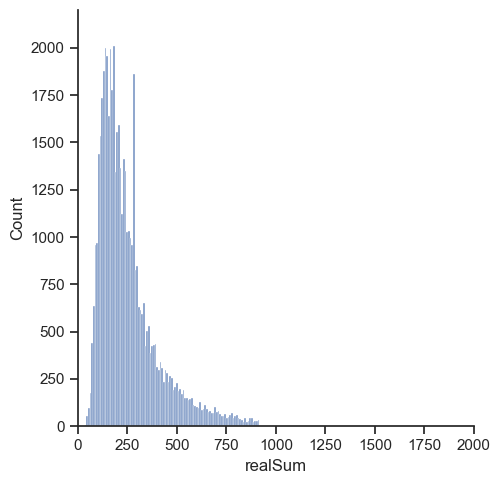

In [96]:
fig = plt.figure(figsize=(50,50))
sns.displot(df_combinado['realSum'])
plt.xlim(left=0, right=2000)  # Establecer los límites del eje x
plt.ylim(bottom=0, top=2200)  # Establecer los límites del eje y
plt.show()

# Analisis de variables

Observamos la proporcion de cada tipo de habitacion y dentro de cada una la cantidad de superhost

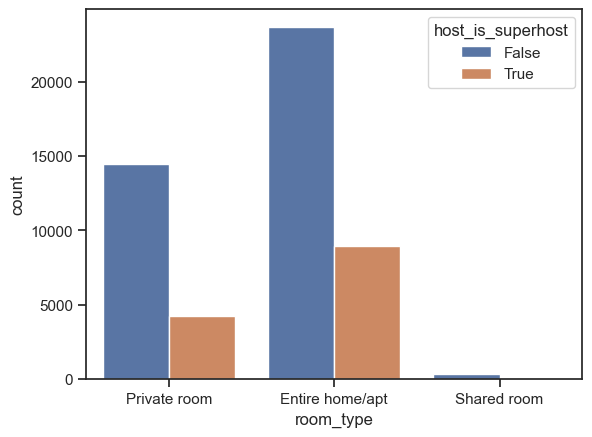

In [97]:
#sns.set(style='darkgrid')
sns.countplot(x='room_type',data=df_combinado,hue='host_is_superhost')
plt.show()

Analizamos la distribucion de los precios por persona

<Figure size 1000x1000 with 0 Axes>

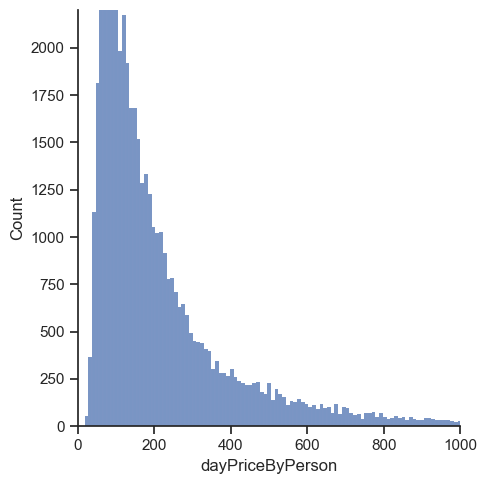

In [98]:
fig = plt.figure(figsize=(10,10))
sns.displot(df_combinado['dayPriceByPerson'])
plt.xlim(left=0, right=1000)  # Establecer los límites del eje x
plt.ylim(bottom=0, top=2200)  # Establecer los límites del eje y
plt.show()

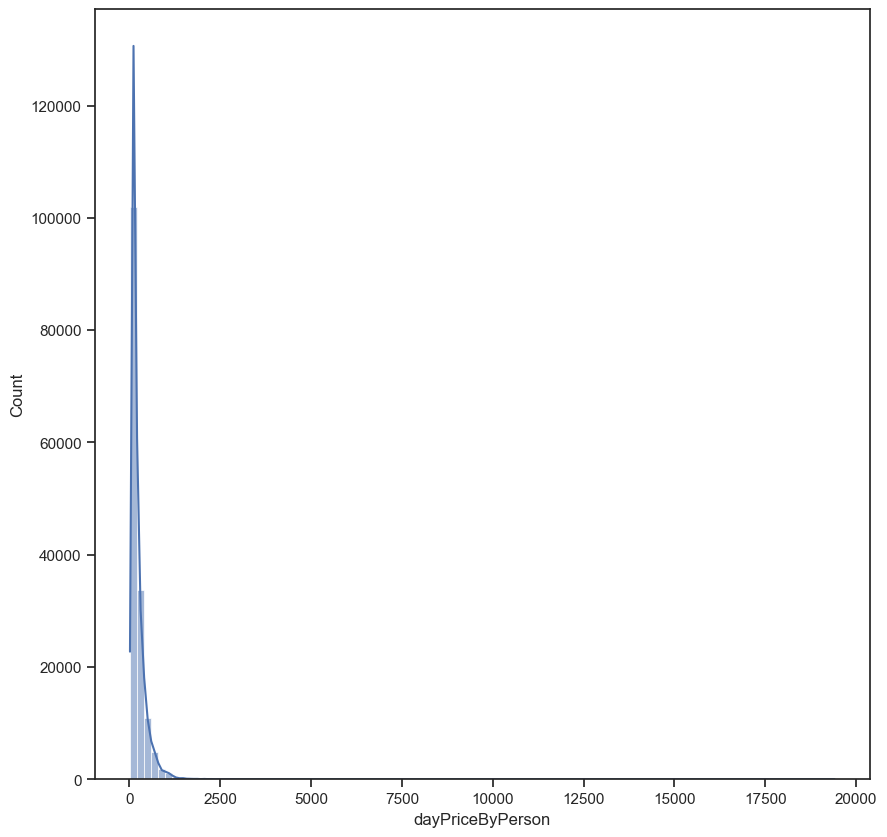

In [84]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df_combinado['dayPriceByPerson'], bins=100, kde=True)
plt.show()

Analizando el promedio de precios por dia por pesona en cada ciudad

Text(0.5, 1.0, 'Promedio de Precios por Ciudad')

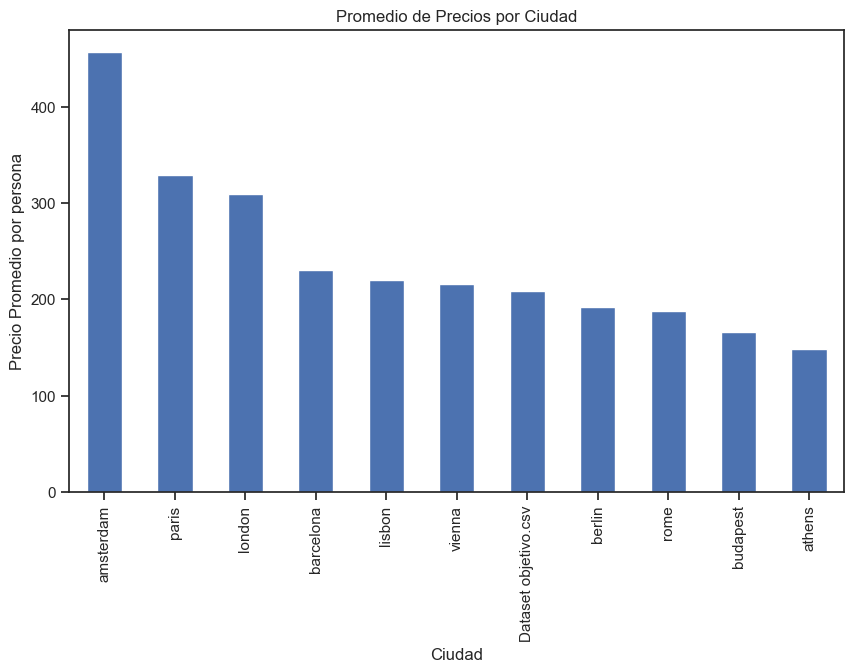

In [85]:
# Calcular el promedio de precios por ciudad
promedios = df_combinado.groupby('city')['dayPriceByPerson'].mean().sort_values(ascending=False)

# Crear el gráfico de barras con los promedios de precios
fig, ax = plt.subplots(figsize=(10, 6))
promedios.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio Promedio por persona')
ax.set_title('Promedio de Precios por Ciudad')

Analizando la relacion entre las variables de limpieza y valoracion final

Text(0.1, 0.9, 'Coef. Corr.: 0.71')

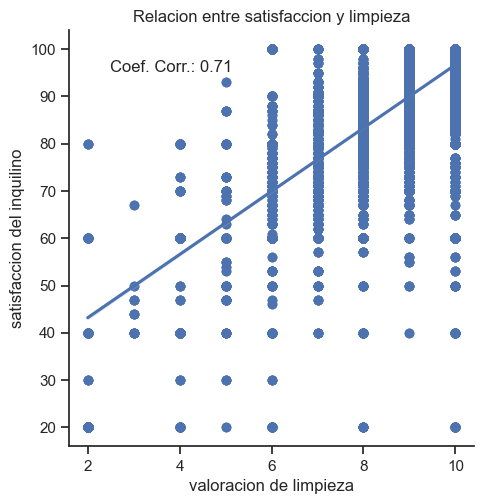

In [86]:
sns.set_theme(style='ticks')
sns.lmplot(
    data = df_combinado, x = 'cleanliness_rating', y='guest_satisfaction_overall'
)

coef_corr = df_combinado['cleanliness_rating'].corr(df_combinado['guest_satisfaction_overall'])

plt.xlabel('valoracion de limpieza')
plt.ylabel('satisfaccion del inquilino')
plt.title('Relacion entre satisfaccion y limpieza')

plt.annotate(f'Coef. Corr.: {coef_corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

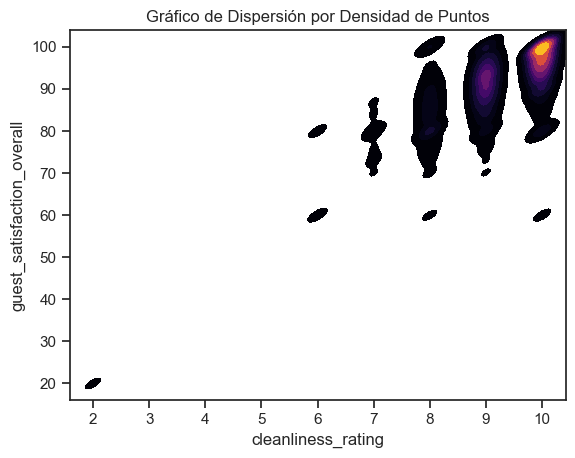

In [63]:
sns.kdeplot(x=df_combinado['cleanliness_rating'], y=df_combinado['guest_satisfaction_overall'], cmap='inferno', fill=True)

# Personalizar el gráfico
plt.xlabel('cleanliness_rating')
plt.ylabel('guest_satisfaction_overall')
plt.title('Gráfico de Dispersión por Densidad de Puntos')

plt.show()

In [65]:
lon_grid = np.linspace(df_combinado['lng'].min(), df_combinado['lng'].max(), 100)
lat_grid = np.linspace(df_combinado['lat'].min(), df_combinado['lat'].max(), 100)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)


In [87]:
from scipy.interpolate import griddata

In [88]:
points = df_combinado[['lng', 'lat']].values
values = df_combinado['dayPrice'].values
price_grid = griddata(points, values, (lon_mesh, lat_mesh), method='linear')

C:\Users\leoca\AppData\Local\Temp\ipykernel_5244\3721170010.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='lng', y='lat', data=filtered_data, hue='dayPrice', palette='inferno', edgecolor='black', alpha=0.8)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

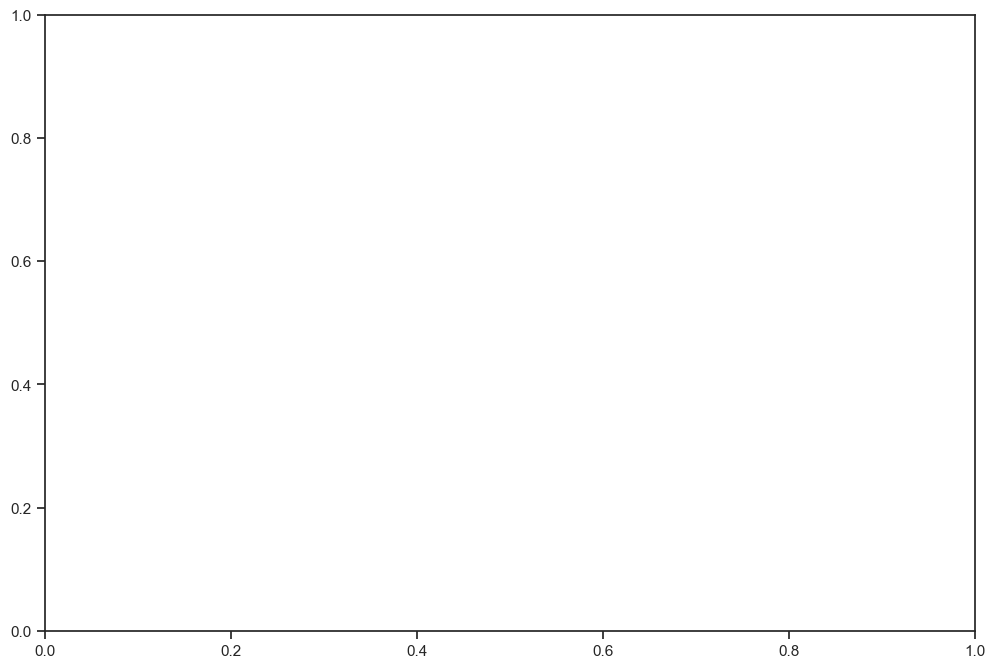

In [89]:
city_name = 'Athens'
filtered_data = df_combinado[df_combinado['city'] == city_name]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lng', y='lat', data=filtered_data, hue='dayPrice', palette='inferno', edgecolor='black', alpha=0.8)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Airbnb Rental Prices Heat Map - {city_name}')
plt.show()

## Exportación de dataset definitivo

In [109]:
df_combinado.to_csv("Dataset objetivo.csv", index=False)